## Welcome!  <img align="right" src="machine.png">

Machine Learning (ML) is a huge topic with many complicated algorithms and concepts, depending on what exactly **what** it is you want to 'learn' and **how** you want to 'learn it'.

## Machine Learning Eco-System (kinda) 

The *what* for today is, given a set of housing data, can we classify whether the home is located in SF or NY?

For the *how*, we'll be learning about decision trees, training a simple model, and making some predicitons.

![Map](learning_map.png)

Image Credit: https://simon32.github.io/2018/11/23/ML1/

## D is for Data 

Today we're focusing on the *applied* part of Machine Learning (ML), so we're assuming clean, organized data.

In *the wild* as they say, you'll normally have to find, scrape/procure, and clean it yourself.

I'll include some helpful resources at the end.

## But on that note...

#### Gabage In, Garbage Out

ML is data dependent and data hungry.  Before ML can even begin, data needs to be tracked, stored, cleaned, and analyzed.  With proper data practices, even the most sophisticated ML algorithms won't help you.

While this certainly applies to hype about blockchain, as stated in the picture, it equally applied to Machine Learning.

`Junk + Machine Learning = Still Junk`

![GIGO](gigo.png)

Source: https://medium.com/proofofimpact/garbage-in-garbage-out-gigo-on-the-blockchain-b55f20f6dada

# Today's Toolkit

## Python - Jumping on the bandwagon

- Simple, easy to learn syntax
- There's a package for that
- Fast edit-test-debug cycle

Source: https://www.python.org/doc/essays/blurb/

In [122]:
def make_hello_world(intensity):
    return "Hello World" + (intensity * "!")
    
output = make_hello_world(3)
print(output)

#demonstrate error/stacktrace

Hello World!!!


## The Incredible Growth Of Python

An interesting blog post from Stack Overflow with charts based on question views per language.

![Python Growth ](projections.png)

![Python Growth Small](small_projections.png)

Source: https://stackoverflow.blog/2017/09/06/incredible-growth-python

##   What is a Jupyter Notebook? <img align="left" src="jupyter.svg" style="margin: 5px 20px">

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

https://jupyter.org

I've been loving Jupyter Notebooks since I've discovered them.  They're great for writing code, visualizing code, and discussing code with markdown!  

This whole notebook is your example...

## What is Pandas? <img align="right" src="py_pandas.png">

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

https://pandas.pydata.org/pandas-docs/stable/ 

In [123]:
import pandas as pd

data = {'name': ["Clinton", "Dylan", "Jack"],
     'age': [2, 45, 102]} 

df = pd.DataFrame(data)
df

,name,age
0,Clinton,2
1,Dylan,45
2,Jack,102


In [124]:
# A year's gone by?  Need to adjust an entire 'series'?
# series = a single column within a DataFrame (aka vector, aka array but not exactly)
df.age = df['age'] + 1
df

,name,age
0,Clinton,3
1,Dylan,46
2,Jack,103


## Linear Algebra Anyone?

Under the hood matrix multiplication makes operations applied to an entire series very performant on large datasets.

Let's save that for another day...

## Can we write some dang code yet?

#### Today's tutorial here:
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

#### Today's dataset available here:

https://github.com/jadeyee/r2d3-part-1-data/blob/master/part_1_data.csv

In [125]:
#best practice to import pandas as the variable pd
import pandas as pd

#the first two lines are commentary so they need skipped
#besides that, pandas automatically reads the csv 
#right into a dataframe with headers!
df = pd.read_csv("housing_SF_NY.csv", skiprows=2)

In [126]:
#nice concise look at the first 5 rows of data
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [127]:
#number of rows vs number of columns
df.shape

(492, 8)

In [128]:
#get a sense of counts and names of columns
#sometimes data is in a different format than you thought
#drop rows that have N/A data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
in_sf             492 non-null int64
beds              492 non-null float64
bath              492 non-null float64
price             492 non-null int64
year_built        492 non-null int64
sqft              492 non-null int64
price_per_sqft    492 non-null int64
elevation         492 non-null int64
dtypes: float64(2), int64(6)
memory usage: 30.8 KB


In [129]:
# class distribution
# in this dataset, in_sf is the target
# 0 and 1 are our labels for the target
# someone correct me if I misuse any of these terms
df.groupby('in_sf').size()

in_sf
0    224
1    268
dtype: int64

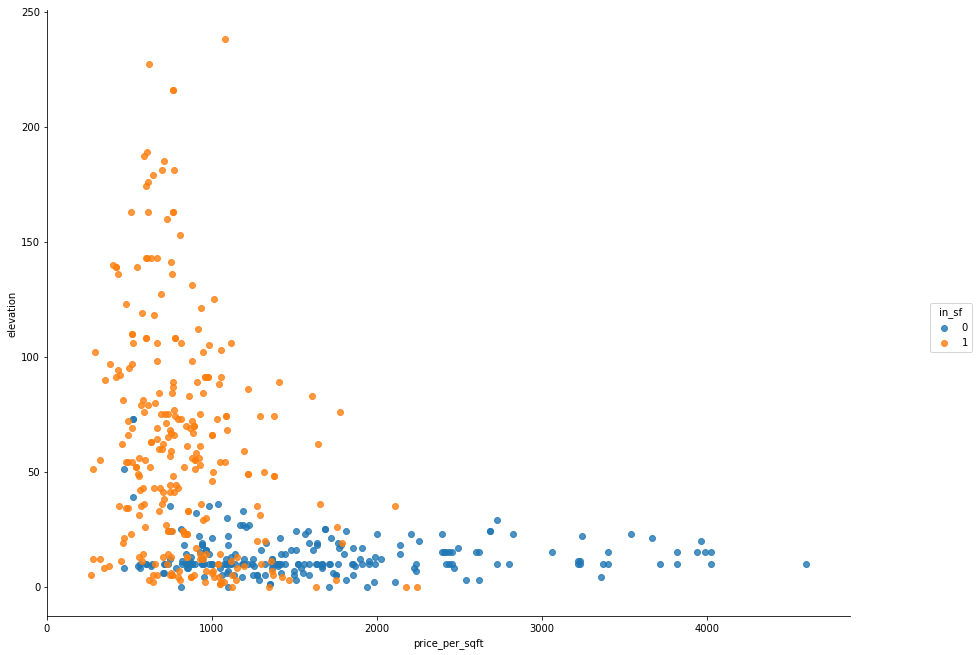

In [130]:
#seaborn is a very simple visualizaiton framework for those of us (me)
#who aren't very savy in such things
import seaborn as sns
import matplotlib.pyplot as plt

#essentially, a scatter plot of the dataframe assigning the 
#'target' to 'hue' in order to see the classifications of our data
sns.lmplot('price_per_sqft', 'elevation', df, hue='in_sf', fit_reg=False)

#gcf = get current figure
figure = plt.gcf()

#just changes the scale of the plot on the screen
figure.set_size_inches(15, 10)

#show the plot
plt.show()

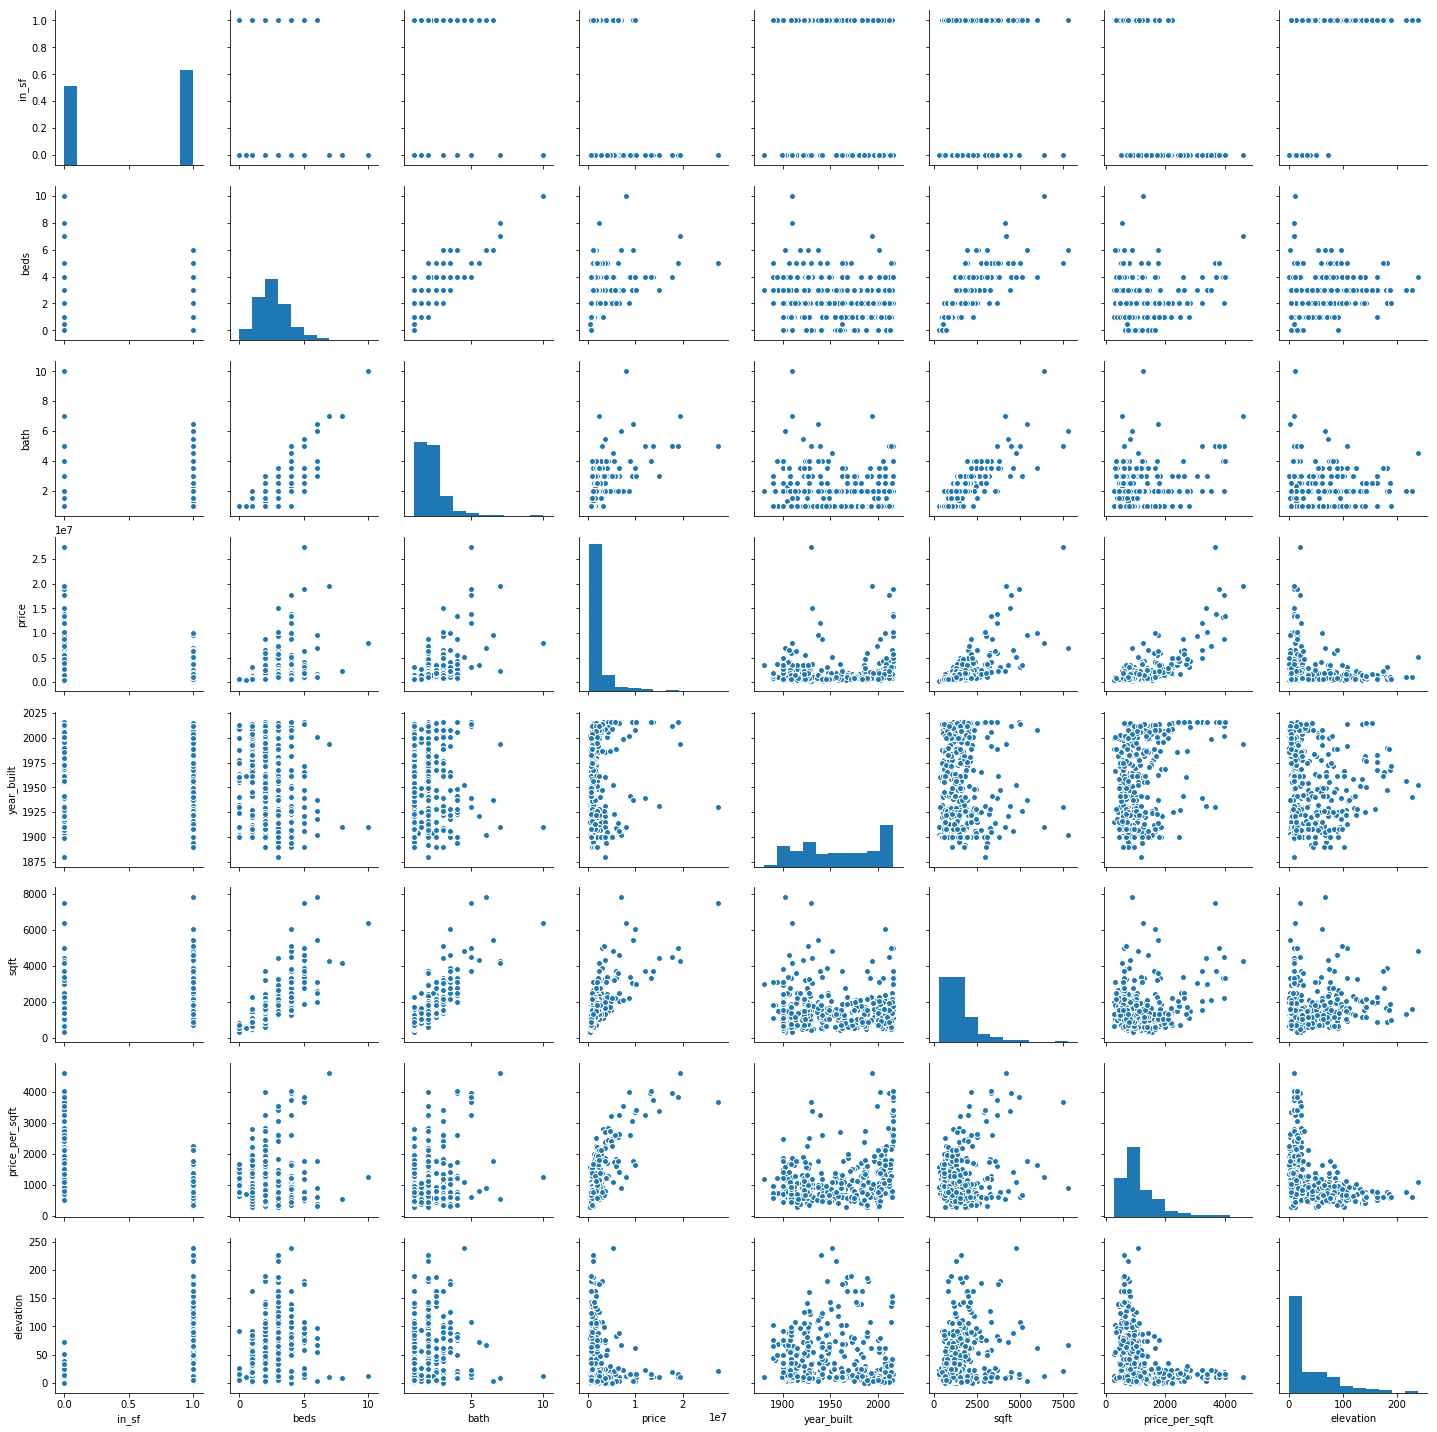

In [131]:
#one line, lots of info!
sns.pairplot(df)

# #something better
# sns.pairplot(df, hue = 'in_sf', diag_kind = 'kde',
#              plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#              size = 4)

#helps us find correlations in the data

## Split-out a validation dataset

In [132]:
#take the target series
Y = df['in_sf']

#take all other data except the target series
X = df.drop('in_sf', axis=1)

#only train with 80% of our data, keep the other 20% for validation
validation_size = 0.20

#assign a random state if you want the split to be consistent every time
#I can see benefits to managing seed state when developing
#but in evaluating your model you likely want to keep it random
#but what do I know...
seed = 7

In [133]:
#sklearn is a machine learning library with plenty of 
#out of the box models for you to play with and tweak

from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(393, 7)
(99, 7)
(393,)
(99,)


## Now For The Machine Learning!

In [135]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Hmm, that was anticlimactic...

### A correct SF prediction

In [136]:
record = X_test.iloc[[10]]
print(record)
print("\n")

target = Y_test.iloc[[10]]
print(target)
print("\n")

prediction = model.predict(record)
print(prediction)

     beds  bath    price  year_built  sqft  price_per_sqft  elevation
261   2.0   2.0  1299000        2004  1453             894          5


261    1
Name: in_sf, dtype: int64


[1]


### A correct NY prediction

In [137]:
record = X_test.iloc[[40]]
print(record)
print("\n")

target = Y_test.iloc[[40]]
print(target)
print("\n")

prediction = model.predict(record)
print(prediction)

     beds  bath    price  year_built  sqft  price_per_sqft  elevation
217   2.0   2.0  2499000        2004  1658            1507         24


217    0
Name: in_sf, dtype: int64


[0]


### An incorrect NY prediction :(

In [138]:
record = X_test.iloc[[0]]
print(record)
print("\n")

target = Y_test.iloc[[0]]
print(target)
print("\n")

#a correct NY prediction
prediction = model.predict(record)
print(prediction)

     beds  bath    price  year_built  sqft  price_per_sqft  elevation
242   2.0   2.0  1700000        1987  1250            1360         11


242    1
Name: in_sf, dtype: int64


[0]


## So, how accurate is our simple model?

In [139]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
score = accuracy_score(Y_test, Y_pred)*100
score

84.84848484848484

In [140]:
from sklearn.metrics import confusion_matrix

# 32 NY homes correctly identified as NY
# 11 SF homes incorrectly identified as NY
# 5 NY homes incorrectly identified as SF
# 51 SF homes correctly identified as SF

#Our particular model tends to do better classifying SF homes correctly

confusion_matrix(Y_test, Y_pred)

array([[33,  4],
       [11, 51]])

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.811603 (0.076275)
LDA: 0.867628 (0.044177)
KNN: 0.636026 (0.081443)
CART: 0.893397 (0.052528)
NB: 0.714872 (0.075926)
SVM: 0.613269 (0.068992)


## Resources

#### Data science resources, datasets, a lot of competitions
http://kaggle.com

#### Udemy
https://www.udemy.com/user/lazy-programmer/

#### Machine Learning Guide Podcast
http://ocdevel.com/mlg

#### A great site for learning and practicing Data Science
https://www.datacamp.com
    
#### Start getting into the math and intuition of ML
https://www.coursera.org/learn/machine-learning

#### Join the Advanced Analytics group!!!
https://teams.microsoft.com/l/team/19%3a3c1649f218144647965d566a97cbd887%40thread.skype/conversations?groupId=52ff42ca-f945-4baf-9b9d-d31043a54ece&tenantId=ae9d6e9a-cc18-4204-ac29-43a0ccb860e8